# Poject 1 : EV stock 

### GROUP Memebers:
1:SHICHAO ZHOU
2:YIHAO SUN

## Part 1: Introduction

We will work with a dataset containing information on electric vehicle stock.  Recently, electric vehicle stocks have received much attention from investors. We have selected four representative companies and they are NIO, XPEV, LI, and TSLA.

#### Research question(s)
- Calculate the six months return of each stock. Which stock has the highest return? Which stock has the lowest return during the six months?
- Which stock has the most volatility? 
- Are the prices of these four stocks highly positively correlated?

## Part 2: Data Summary

We downloaded the dataset from "historical data" of Yahoo Finance. Related links are shared below:

nio: https://finance.yahoo.com/quote/NIO?p=NIO&.tsrc=fin-srch

xpev: https://finance.yahoo.com/quote/XPEV?p=XPEV&.tsrc=fin-srch

li: https://finance.yahoo.com/quote/LI?p=LI&.tsrc=fin-srch

tsla: https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch

There is 8 columns and 503 rows in the dataset.
The dataset contains 8 attributes and they are "symbol","date","open","high","low","close","adj close" and "volume".

Data type:

1: symbol : stock ticker
- Categorical nominal

2:date : trade day exclude weekends and holidays
- Categorical ordinal

3: open : It is the price at which the financial security opens in the market when trading begins.  
- numeric

4: high : The highest closing price of a stock over the past 52 weeks, adjusted for any stock splits, or the highest intraday price of a stock in the most recent (or current) trading session.  
- numeric

5:low : Low is the minimum price of a stock in a period.
- numeric

6: close: "Closing price" generally refers to the last price at which a stock trades during a regular trading session.
- numeric

7: adj close: The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It is often used when examining historical returns or doing a detailed analysis of past performance.
- numeric

8: volume: Volume measures the number of shares traded in a stock or contracts traded in futures or options.
- numeric



#### Data preparation

In [1]:
# Import libraries we needed.
import numpy as np
import pandas as pd

In [2]:
# # read contents of a csv file from GitHub into a Pandas DataFrame
filename = "https://raw.githubusercontent.com/sczhou0705/DAV-5400/main/ev.csv"
df =  pd.read_csv(filename)
df

,symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,nio,8/26/2020,19.010000,20.969999,18.559999,20.440001,20.440001,364104600
1,nio,8/27/2020,19.990000,20.469999,18.760000,19.879999,19.879999,199850300
2,nio,8/28/2020,18.870001,19.440001,18.110001,18.500000,18.500000,154799800
3,nio,8/31/2020,17.190001,19.830000,16.820000,19.030001,19.030001,226610900
4,nio,9/1/2020,19.450001,20.379999,18.750000,20.120001,20.120001,137226000
...,...,...,...,...,...,...,...,...
498,tsla,2/19/2021,795.000000,796.789978,777.369995,781.299988,781.299988,18904800
499,tsla,2/22/2021,762.640015,768.500000,710.200012,714.500000,714.500000,37011700
500,tsla,2/23/2021,662.130005,713.609985,619.000000,698.840027,698.840027,66397000
501,tsla,2/24/2021,711.849976,745.000000,694.169983,742.020020,742.020020,36677100


In [3]:
#### test missing values
print(pd.isnull(df))

     symbol   Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False  False      False   False
1     False  False  False  False  False  False      False   False
2     False  False  False  False  False  False      False   False
3     False  False  False  False  False  False      False   False
4     False  False  False  False  False  False      False   False
..      ...    ...    ...    ...    ...    ...        ...     ...
498   False  False  False  False  False  False      False   False
499   False  False  False  False  False  False      False   False
500   False  False  False  False  False  False      False   False
501   False  False  False  False  False  False      False   False
502   False  False  False  False  False  False      False   False

[503 rows x 8 columns]


In [4]:
### check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     503 non-null    object 
 1   Date       503 non-null    object 
 2   Open       503 non-null    float64
 3   High       503 non-null    float64
 4   Low        503 non-null    float64
 5   Close      503 non-null    float64
 6   Adj Close  503 non-null    float64
 7   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 31.6+ KB


In [5]:
# filter symbol by nio,xpev,li,tsla respectively
nio = df[df['symbol'] == 'nio']
nio

,symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,nio,8/26/2020,19.010000,20.969999,18.559999,20.440001,20.440001,364104600
1,nio,8/27/2020,19.990000,20.469999,18.760000,19.879999,19.879999,199850300
2,nio,8/28/2020,18.870001,19.440001,18.110001,18.500000,18.500000,154799800
3,nio,8/31/2020,17.190001,19.830000,16.820000,19.030001,19.030001,226610900
4,nio,9/1/2020,19.450001,20.379999,18.750000,20.120001,20.120001,137226000
...,...,...,...,...,...,...,...,...
121,nio,2/19/2021,55.720001,56.040001,54.099998,55.040001,55.040001,42682700
122,nio,2/22/2021,54.180000,54.369999,50.400002,50.680000,50.680000,68146000
123,nio,2/23/2021,45.619999,49.669998,41.660000,49.110001,49.110001,142185500
124,nio,2/24/2021,49.310001,52.070000,47.750000,51.860001,51.860001,82251500


In [6]:
# filter symbol by nio,xpev,li,tsla respectively
xpev = df[df['symbol'] == 'xpev']
xpev

,symbol,Date,Open,High,Low,Close,Adj Close,Volume
252,xpev,8/27/2020,23.100000,25.000000,21.200001,21.219999,21.219999,82219700
253,xpev,8/28/2020,23.980000,24.400000,22.020000,22.790001,22.790001,44847300
254,xpev,8/31/2020,22.690001,22.790001,20.330000,20.500000,20.500000,20816000
255,xpev,9/1/2020,20.980000,21.790001,20.100000,21.610001,21.610001,15291400
256,xpev,9/2/2020,21.990000,22.000000,20.379999,21.090000,21.090000,9090100
...,...,...,...,...,...,...,...,...
372,xpev,2/19/2021,42.459999,42.580002,40.660000,40.880001,40.880001,14054100
373,xpev,2/22/2021,39.740002,40.470001,37.799999,38.000000,38.000000,22573900
374,xpev,2/23/2021,36.400002,38.040001,32.720001,37.910000,37.910000,35811800
375,xpev,2/24/2021,37.830002,39.080002,35.750000,38.709999,38.709999,17450100


In [7]:
# filter symbol by nio,xpev,li,tsla respectively
li = df[df['symbol'] == 'li']
li

,symbol,Date,Open,High,Low,Close,Adj Close,Volume
126,li,8/26/2020,18.990000,24.480000,18.990000,23.379999,23.379999,31561300
127,li,8/27/2020,22.260000,22.309999,19.299999,19.379999,19.379999,29318200
128,li,8/28/2020,20.209999,20.500000,17.600000,17.600000,17.600000,14639300
129,li,8/31/2020,17.759001,18.840000,16.200001,16.299999,16.299999,18322700
130,li,9/1/2020,17.080000,18.459999,16.700001,18.290001,18.290001,18119400
...,...,...,...,...,...,...,...,...
247,li,2/19/2021,29.950001,30.209999,29.450001,29.840000,29.840000,10237400
248,li,2/22/2021,29.299999,29.410000,27.750000,27.840000,27.840000,14765700
249,li,2/23/2021,26.450001,27.350000,23.520000,26.990000,26.990000,24590200
250,li,2/24/2021,27.209999,28.870001,26.100000,28.680000,28.680000,19835000


In [8]:
# filter symbol by nio,xpev,li,tsla respectively
tsla = df[df['symbol'] == 'tsla']
tsla

,symbol,Date,Open,High,Low,Close,Adj Close,Volume
377,tsla,8/26/2020,412.000000,433.200012,410.726013,430.634003,430.634003,71197000
378,tsla,8/27/2020,436.092010,459.119995,428.500000,447.750000,447.750000,118465000
379,tsla,8/28/2020,459.023987,463.697998,437.303986,442.679993,442.679993,100406000
380,tsla,8/31/2020,444.609985,500.140015,440.109985,498.320007,498.320007,118374400
381,tsla,9/1/2020,502.140015,502.489990,470.510010,475.049988,475.049988,90119400
...,...,...,...,...,...,...,...,...
498,tsla,2/19/2021,795.000000,796.789978,777.369995,781.299988,781.299988,18904800
499,tsla,2/22/2021,762.640015,768.500000,710.200012,714.500000,714.500000,37011700
500,tsla,2/23/2021,662.130005,713.609985,619.000000,698.840027,698.840027,66397000
501,tsla,2/24/2021,711.849976,745.000000,694.169983,742.020020,742.020020,36677100


## Part 3: Exploratory Data Analysis

In [9]:
## Provide summary statistics for each attribute
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,503.0,1.715406e+02,2.528627e+02,15.35,2.247500e+01,4.248000e+01,2.140850e+02,8.913800e+02
High,503.0,1.760322e+02,2.583346e+02,15.97,2.320000e+01,4.508000e+01,2.216150e+02,9.004000e+02
Low,503.0,1.665751e+02,2.468626e+02,15.02,2.132000e+01,4.110000e+01,1.964450e+02,8.716000e+02
Close,503.0,1.718023e+02,2.534649e+02,15.09,2.218500e+01,4.341000e+01,2.011900e+02,8.830900e+02
Adj Close,503.0,1.718023e+02,2.534649e+02,15.09,2.218500e+01,4.341000e+01,2.011900e+02,8.830900e+02
Volume,503.0,5.855279e+07,7.055637e+07,2789400.00,1.621480e+07,3.291190e+07,7.284430e+07,5.771851e+08


## Attribute:Close 

Close is the standard benchmark used by investors to track its performance over time,and it is most important attribute in Open, High, Low, Close.
Close can be used to measure the changes in market sentiment towards that stock.

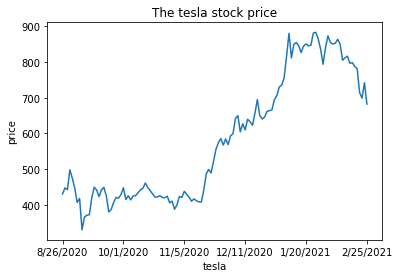

count    126.000000
mean     582.778047
std      173.928557
min      330.209991
25%      424.342507
50%      538.614990
75%      740.292511
max      883.090027
Name: Close, dtype: float64

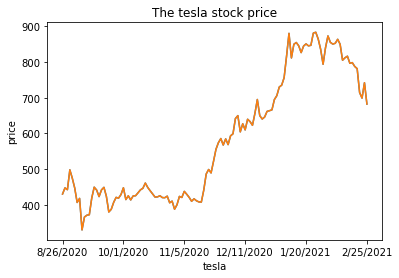

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
# track the trend of telsa stock price
#filter 'date' and 'close'
# assign 'date' to axis-x 'close' to axis-y
# matplotlib
x =tsla['Date']
y =tsla['Close']
tick_spacing = 1
tick_spacing = 25
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('tesla')
plt.ylabel('price')
plt.title('The tesla stock price')
plt.show()
#seaborn
tick_spacing = 1
tick_spacing = 25
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('tesla')
plt.ylabel('price')
plt.title('The tesla stock price')
sns.lineplot(x = tsla['Date'], y = tsla['Close'])

tsla['Close'].describe()

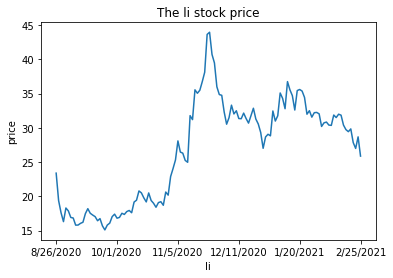

count    126.000000
mean      26.681270
std        7.503629
min       15.090000
25%       18.762501
50%       29.189999
75%       32.122502
max       43.959999
Name: Close, dtype: float64

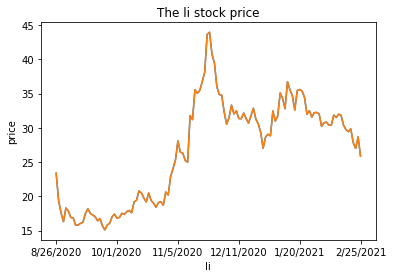

In [11]:
# track the trend of li stock price
#filter 'date' and 'close'
# assign 'date' to axis-x 'close' to axis-y
# matplotlib
x =li['Date']
y =li['Close']
tick_spacing = 1
tick_spacing = 25
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('li')
plt.ylabel('price')
plt.title('The li stock price')
plt.show()
#seaborn
tick_spacing = 1
tick_spacing = 25
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('li')
plt.ylabel('price')
plt.title('The li stock price')
sns.lineplot(x = li['Date'], y = li['Close'])

li['Close'].describe()

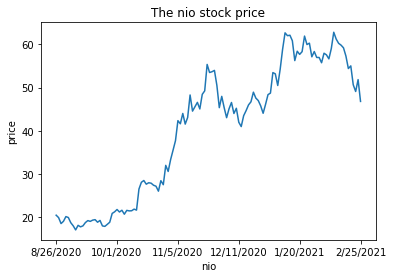

count    126.000000
mean      40.209603
std       15.413564
min       17.030001
25%       21.655001
50%       44.864999
75%       53.922500
max       62.840000
Name: Close, dtype: float64

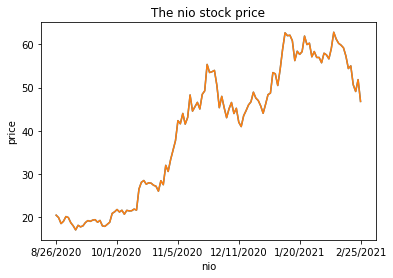

In [12]:
# track the trend of nio stock price
#filter 'date' and 'close'
# assign 'date' to axis-x 'close' to axis-y
# matplotlib
x =nio['Date']
y =nio['Close']
tick_spacing = 1
tick_spacing = 25
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('nio')
plt.ylabel('price')
plt.title('The nio stock price')
plt.show()
#seaborn
tick_spacing = 1
tick_spacing = 25
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('nio')
plt.ylabel('price')
plt.title('The nio stock price')
sns.lineplot(x = nio['Date'], y = nio['Close'])

nio['Close'].describe()

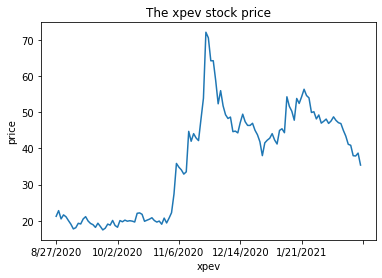

count    125.000000
mean      36.466000
std       14.507761
min       17.450001
25%       20.139999
50%       41.549999
75%       47.610001
max       72.169998
Name: Close, dtype: float64

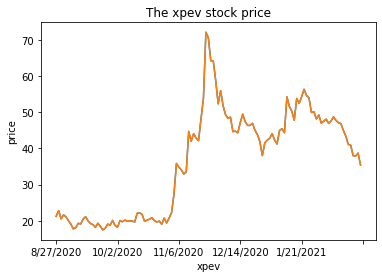

In [13]:
# track the trend of xpev stock price
#filter 'date' and 'close'
# assign 'date' to axis-x 'close' to axis-y
# matplotlib
x =xpev['Date']
y =xpev['Close']
tick_spacing = 1
tick_spacing = 25
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('xpev')
plt.ylabel('price')
plt.title('The xpev stock price')
plt.show()
#seaborn
tick_spacing = 1
tick_spacing = 25
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('xpev')
plt.ylabel('price')
plt.title('The xpev stock price')
sns.lineplot(x = xpev['Date'], y = xpev['Close'])

xpev['Close'].describe()

Narrative describe: From the chart, we can see that the stock prices of Xiaopeng and Li are very similar. At the end of last year, the xpev prices and li stock prices reached a peak, and then the prices are falling sharply.The stock prices of nio and tesla are very similar. Both of them showed a steady upward trend.

## Attribute: Volume

Trading volume is a meaure of how much of a given financial asset  traded in a period of time. so we want to give deeply insight into the attribute of Volume.

In [14]:
# compare the average volume of stocks 

a = nio['Volume'].describe()['mean']
print("nio：the arithmetic average volume is",a )
b = xpev['Volume'].describe()['mean']
print("xpev：the arithmetic average volume is",b )
c = li['Volume'].describe()['mean']
print("li：the arithmetic average volume is",c )
d = tsla['Volume'].describe()['mean']
print("tsla：the arithmetic average volume is",d )

nio：the arithmetic average volume is 140443319.84126985
xpev：the arithmetic average volume is 24031272.8
li：the arithmetic average volume is 20695414.285714287
tsla：the arithmetic average volume is 48767184.92063492


In [15]:
# Create a data dictionary 
data = {'nio':a,'xpev':b,'li':c,'tsla':d}
data

{'nio': 140443319.84126985,
 'xpev': 24031272.8,
 'li': 20695414.285714287,
 'tsla': 48767184.92063492}

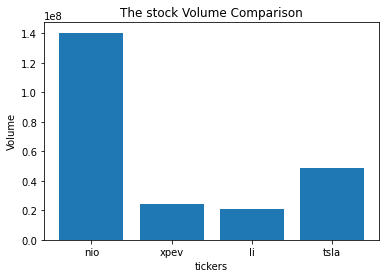

In [16]:
# Matplotlib
plt.bar(range(len(data)),data.values(),align='center')
plt.xticks(range(len(data)),list(data.keys()))
plt.xlabel('tickers')
plt.ylabel('Volume')
plt.title('The stock Volume Comparison')
plt.show()

<AxesSubplot:title={'center':'The stock Volume Comparison'}, xlabel='tickers', ylabel='Volume'>

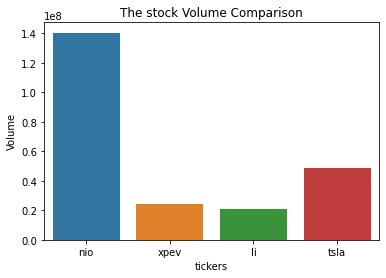

In [17]:
#seaborn
keys = list(data.keys())
vals = list(data.values())
plt.xlabel('tickers')
plt.ylabel('Volume')
plt.title('The stock Volume Comparison')
sns.barplot(x=keys,y=vals)

Narrative describe: The nio stock has the highest volume among four stock. It represents that nio attracts more attention of investors during the six months. The tsla volume is in the second place. The volume of nio is twice that of tsla.

# Part 4:Inference

# Question1: Calculate the six-months return of each stock. Which stock has the highest return and which stock has the lowest return during the six month?

Approach: We use log return to calculate the return of each stock. Log return is one of three methods for calculating return and it assumes returns are compounded continuously rather than across sub-periods. It is calculated by taking the natural log of the ending value divided by the beginning value.
    
    1.Using .shift() to find daily returns.
   
    2.Using .mean() to find average of daily returns for each stock.
    
    3.Compare four stocks and tell apart which has the highest return.

In [18]:
# create function re(x)

def re(x):
    logreturn = np.log(x['Adj Close'] / x['Adj Close'].shift(1))
    log_return_d = logreturn.mean()
    return log_return_d 
print("nio: 180 days return is",str(round(re(nio) * 180,4) * 100) +'%')
print("xpev: 180 days return is",str(round(re(xpev) * 180,4) * 100) +'%')
print("li: 180 days return is",str(round(re(li) * 180,4) * 100) +'%')
print("tesla: 180 days return is",str(round(re(tsla) * 180,4) * 100) +'%')

nio: 180 days return is 119.32000000000001%
xpev: 180 days return is 74.29%
li: 180 days return is 14.57%
tesla: 180 days return is 66.25%


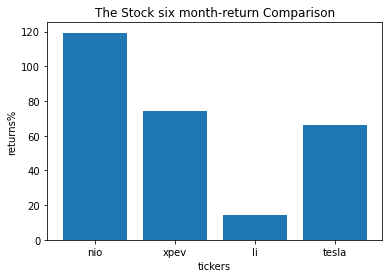

In [19]:
# Matplotlib
log_return = {'nio':119.32,'xpev':74.29,'li':14.57,'tesla':66.25}
plt.bar(range(len(log_return)),log_return.values(),align='center')
plt.xticks(range(len(log_return)),list(log_return.keys()))
plt.xlabel('tickers')
plt.ylabel('returns%')
plt.title('The Stock six month-return Comparison')
plt.show()


<AxesSubplot:title={'center':'The Stock six month-return Comparison'}, xlabel='tickers', ylabel='returns%'>

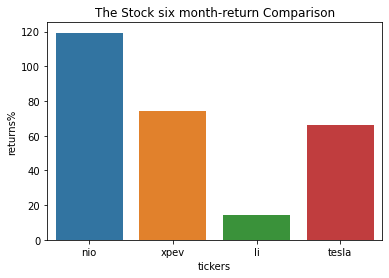

In [20]:
#seaborn
keys = list(log_return.keys())
vals = list(log_return.values())
plt.xlabel('tickers')
plt.ylabel('returns%')
plt.title('The Stock six month-return Comparison')
sns.barplot(x=keys,y=vals)

Narrative describe: Nio has the highest return and li has the lowest return during the six months

# Question 2 : Stock risk analysis: Which stock has the most volatility?

Research approach: Standard deviation sheds light on investment's historical volatility. Normally, a volatile stock has a high standard deviation. A higher standard deviation, a higher risk the stock has. So we consider .std() as our way to answer the question.
1.Using std function to find the daily returns std of four stocks.

2.Using the bar chart to compare the daily returns std of four stocks.

In [21]:
#Using pct_change() to find daily returns
tsla_daily_returns = tsla['Adj Close'].pct_change()
#find tesla dayily return standard deviation
tsla_daily_returns_std = tsla_daily_returns.std()
print(tsla_daily_returns_std)

0.04711259921112519


In [22]:
#Using pct_change() to find daily returns
nio_daily_returns = nio['Adj Close'].pct_change()
#find nio dayily return standard deviation
nio_daily_returns_std = nio_daily_returns.std()
print(nio_daily_returns_std)

0.0533865074023658


In [23]:
#Using pct_change() to find daily returns
xpev_daily_returns = xpev['Adj Close'].pct_change()
#find xpev dayily return standard deviation
xpev_daily_returns_std = xpev_daily_returns.std()
print(xpev_daily_returns_std)

0.07781210307564378


In [24]:
#Using pct_change() to find daily returns
li_daily_returns = li['Adj Close'].pct_change()
#find xpev dayily return standard deviation
li_daily_returns_std = li_daily_returns.std()
print(li_daily_returns_std)

0.05903670257176465


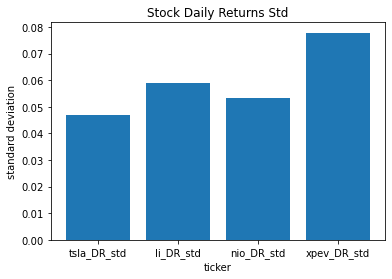

In [25]:
# Using the bar chart to compare the daily returns std of four stocks.

x = ['tsla_DR_std', 'li_DR_std', 'nio_DR_std', 'xpev_DR_std']
y = [0.04711259921112519,0.05903670257176465,0.0533865074023658,0.07781210307564378]
# matplot
plt.bar(x, y)
plt.ylabel('standard deviation')
plt.xlabel('ticker') 
plt.title('Stock Daily Returns Std')
plt.show()

C:\Users\zhous\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Stock Daily Returns Std'}, xlabel='ticker', ylabel='standard deviation'>

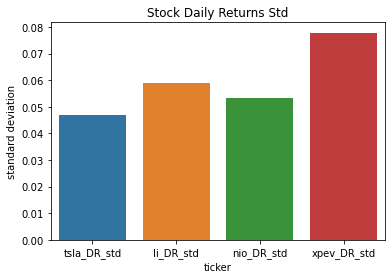

In [26]:
# seaborn
plt.ylabel('standard deviation')
plt.xlabel('ticker') 
plt.title('Stock Daily Returns Std')
sns.barplot(x, y)

Narrative describe: For these four stocks, xpev has the highest daily returns std and tsla has the lowest daily returns std.
For the risk: xpev > li > nio > tsla

# Question 3: Are the prices of these four stocks highly positively correlated?

Research approach: We believe that it is necessary to understand the correlation and dependency between stocks. For the portfolio mananger, the higher the correlation coefficient between stocks, the more he has to avoid heavy holdings of those stocks. He must reasonably allocate his stock positions to ensure the security of his account.

1: In the dataset, we consider date and Adj Close as parameters and filter them in nio.dataframe,tsla.dataframe,xpev.dataframe,
li.dataframe.

2: Using pd.merge() to combine them as a unique dataframe for conveniently moving to next step.

3: Dataframe has .corr(). It can help to deal with the correlation among those four stocks.

In [27]:
# filter date and Adj Close in nio dataframe
nio.copy()
new_nio=nio[["Date","Adj Close"]]
new_nio

,Date,Adj Close
0,8/26/2020,20.440001
1,8/27/2020,19.879999
2,8/28/2020,18.500000
3,8/31/2020,19.030001
4,9/1/2020,20.120001
...,...,...
121,2/19/2021,55.040001
122,2/22/2021,50.680000
123,2/23/2021,49.110001
124,2/24/2021,51.860001


In [28]:
# filter date and Adj Close in xpev dataframe
xpev.copy()
new_xpev=xpev[["Date","Adj Close"]]
new_xpev

,Date,Adj Close
252,8/27/2020,21.219999
253,8/28/2020,22.790001
254,8/31/2020,20.500000
255,9/1/2020,21.610001
256,9/2/2020,21.090000
...,...,...
372,2/19/2021,40.880001
373,2/22/2021,38.000000
374,2/23/2021,37.910000
375,2/24/2021,38.709999


In [29]:
# filter date and Adj Close in li dataframe
li.copy()
new_li = li[["Date","Adj Close"]]
new_li

,Date,Adj Close
126,8/26/2020,23.379999
127,8/27/2020,19.379999
128,8/28/2020,17.600000
129,8/31/2020,16.299999
130,9/1/2020,18.290001
...,...,...
247,2/19/2021,29.840000
248,2/22/2021,27.840000
249,2/23/2021,26.990000
250,2/24/2021,28.680000


In [30]:
# filter date and Adj Close in tsla dataframe
tsla.copy()
new_tsla = tsla[["Date","Adj Close"]]
new_tsla

,Date,Adj Close
377,8/26/2020,430.634003
378,8/27/2020,447.750000
379,8/28/2020,442.679993
380,8/31/2020,498.320007
381,9/1/2020,475.049988
...,...,...
498,2/19/2021,781.299988
499,2/22/2021,714.500000
500,2/23/2021,698.840027
501,2/24/2021,742.020020


In [31]:
# merge li and tsla as a
a = pd.merge(new_li,new_tsla,how='inner',on='Date')
a

,Date,Adj Close_x,Adj Close_y
0,8/26/2020,23.379999,430.634003
1,8/27/2020,19.379999,447.750000
2,8/28/2020,17.600000,442.679993
3,8/31/2020,16.299999,498.320007
4,9/1/2020,18.290001,475.049988
...,...,...,...
121,2/19/2021,29.840000,781.299988
122,2/22/2021,27.840000,714.500000
123,2/23/2021,26.990000,698.840027
124,2/24/2021,28.680000,742.020020


In [32]:
# merge nio and xpev as b
b = pd.merge(new_nio,new_xpev,how='inner',on='Date')
b

,Date,Adj Close_x,Adj Close_y
0,8/27/2020,19.879999,21.219999
1,8/28/2020,18.500000,22.790001
2,8/31/2020,19.030001,20.500000
3,9/1/2020,20.120001,21.610001
4,9/2/2020,19.900000,21.090000
...,...,...,...
120,2/19/2021,55.040001,40.880001
121,2/22/2021,50.680000,38.000000
122,2/23/2021,49.110001,37.910000
123,2/24/2021,51.860001,38.709999


In [33]:
# merge a and b as new df
# update columns name 
# assign df to new dataframe as mydata.
df = pd.merge(a,b,how='inner',on='Date')
mydata = df.rename(columns={'Adj Close_x_x':'li','Adj Close_y_x':'tsla','Adj Close_x_y':'xpev','Adj Close_y_y':'nio'})
mydata

,Date,li,tsla,xpev,nio
0,8/27/2020,19.379999,447.750000,19.879999,21.219999
1,8/28/2020,17.600000,442.679993,18.500000,22.790001
2,8/31/2020,16.299999,498.320007,19.030001,20.500000
3,9/1/2020,18.290001,475.049988,20.120001,21.610001
4,9/2/2020,17.870001,447.369995,19.900000,21.090000
...,...,...,...,...,...
120,2/19/2021,29.840000,781.299988,55.040001,40.880001
121,2/22/2021,27.840000,714.500000,50.680000,38.000000
122,2/23/2021,26.990000,698.840027,49.110001,37.910000
123,2/24/2021,28.680000,742.020020,51.860001,38.709999


In [34]:
# type out correlation 
corr_matrix = mydata.corr()
corr_matrix

,li,tsla,xpev,nio
li,1.000000,0.681448,0.909676,0.972743
tsla,0.681448,1.000000,0.863696,0.730739
xpev,0.909676,0.863696,1.000000,0.903530
nio,0.972743,0.730739,0.903530,1.000000


<AxesSubplot:>

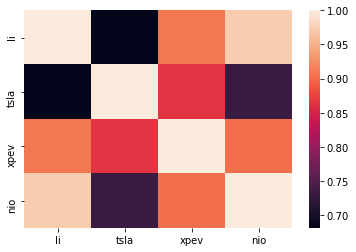

In [35]:
#seaborn
sns.heatmap(corr_matrix)

In [36]:
#matplot
row =["li","tsla","xpev","nio"]
column =["li","tsla","xpev","nio"]
re = np.array([[1.000000,0.681448,0.909676,0.972743],[0.681448,1.000000,0.863696,0.730739],[0.909676,0.863696,1.000000,0.903530],
                [0.972743,0.730739,0.903530,1.000000]])

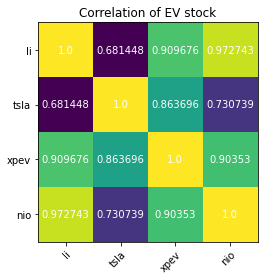

In [37]:
#create plot
fig,ax = plt.subplots()
im = ax.imshow(re)
# show all ticks
ax.set_xticks(np.arange(len(row)))
ax.set_yticks(np.arange(len(column)))
#label them with the respective list entries
ax.set_xticklabels(row)
ax.set_yticklabels(column)
# rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(),rotation = 45,ha='right',rotation_mode="anchor")
#loop over data dimensions and create text annotations
for i in range((len(row))):
    for j in range((len(column))):
        text = ax.text(j,i,re[i,j],
                       ha="center",va="center",color="w")
ax.set_title("Correlation of EV stock")
fig.tight_layout()
plt.show()

Narrative describe: From the two graphs,we can clearly recognize that all of the correlation coefficient is positive in the same 
direction. The stock price of tsla has a positive correlation to the other three stock prices, but it's not as high or approximately 0.86. The stock price of Nio,xpev and li are highly correlated to each other. We think the reason might be they are China concept stock.

# Part 5: Conclusion

Among the four stocks, the xpev stock has the most volatility and the highest investment risk. The investment risk coefficients of tsla are relatively low. Nio has the greatest return on investment，while LI has the worst return on investment.

# Reference:

Python:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumprod.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

Investopedia:

https://www.investopedia.com/terms/c/correlation.asp

https://www.investopedia.com/terms/s/standarddeviation.asp

https://www.investopedia.com/terms/v/volume.asp